In [114]:
# Gabriela Aguilar
# Exploratory Data Analysis of Travel Review Ratings from UC Irvine Machine Learning Repository
# Google reviews on attractions from 24 categories across Europe are considered. Google user rating ranges from 1 to 5 and average user rating per category is calculated.


# **1. Acceso e Importación de Datos:**

*   Importación de las librerias necesarias.
*   Decodificación del repositorio de GitHub y acceso a la base de datos en formato CSV.

In [150]:
# Importando todas las librerias necesarias

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(style="whitegrid")
import plotly.express as px # For dynamic graphics
from io import StringIO
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, r2_score
from sklearn.metrics import f1_score

In [116]:
warnings.filterwarnings('ignore') # Ignorar mensajes de advertencia
plt.rcParams["figure.figsize"] = [10,5] # Tamaño de gráficas

In [117]:
# Carga de los Datos

# Acceso a la base de datos cargada a la repo de GitHub
datos = pd.read_csv("https://github.com/gabrielaaguiv5/ProjectI/raw/main/data/raw/google_review_ratings.csv")

datos.head(10)


,userid,churches,resorts,beaches,parks,theatres,museums,malls,zoos,restaurants,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.00,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
5,User 6,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.63,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
6,User 7,0.0,5.0,3.63,3.63,5.0,2.92,3.03,2.35,2.33,...,1.75,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
7,User 8,0.0,5.0,3.63,3.63,5.0,2.92,5.00,2.63,2.33,...,1.74,0.60,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
8,User 9,0.0,5.0,3.64,3.64,5.0,2.92,3.03,2.62,2.32,...,0.75,0.60,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
9,User 10,0.0,5.0,3.64,3.64,5.0,2.92,5.00,2.35,2.32,...,0.74,0.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **2. Análisis Descriptivo:**

*   Revisión del tipo de datos y cantidad de registros.
*   Identificación y tratamiento de valores faltantes o duplicados.
*   Estadísticas descriptivas (media, mediana, desviación estándar, percentiles, etc.).


In [118]:
# Revisión del tipo de datos y cantidad de registros.
datos.info()
print()
print('Datos:', datos.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 5456 non-null   object 
 1   churches               5456 non-null   float64
 2   resorts                5456 non-null   float64
 3   beaches                5456 non-null   float64
 4   parks                  5456 non-null   float64
 5   theatres               5456 non-null   float64
 6   museums                5456 non-null   float64
 7   malls                  5456 non-null   float64
 8   zoos                   5456 non-null   float64
 9   restaurants            5456 non-null   float64
 10  pubs/bars              5456 non-null   float64
 11  local services         5456 non-null   object 
 12  burger/pizza shops     5455 non-null   float64
 13  hotels/other lodgings  5456 non-null   float64
 14  juice bars             5456 non-null   float64
 15  art 

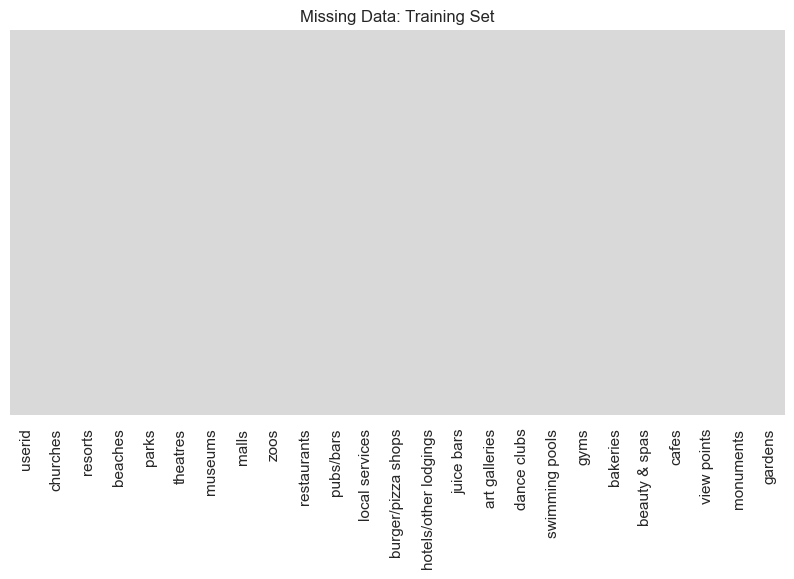

In [119]:
# Heatmap
sns.heatmap(datos.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [120]:
# Identificación de valores faltantes

print(datos.isnull().sum()) # Valores faltantes en cada fila

print()

print("Valores faltantes en la totalidad de la Database:")

print(datos.isnull().any().any()) # Valores faltantes en la totalidad de la Database, revisa cada columna y genera resultado consolidado

userid                   0
churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoos                     0
restaurants              0
pubs/bars                0
local services           0
burger/pizza shops       1
hotels/other lodgings    0
juice bars               0
art galleries            0
dance clubs              0
swimming pools           0
gyms                     0
bakeries                 0
beauty & spas            0
cafes                    0
view points              0
monuments                0
gardens                  1
dtype: int64

Valores faltantes en la totalidad de la Database:
True


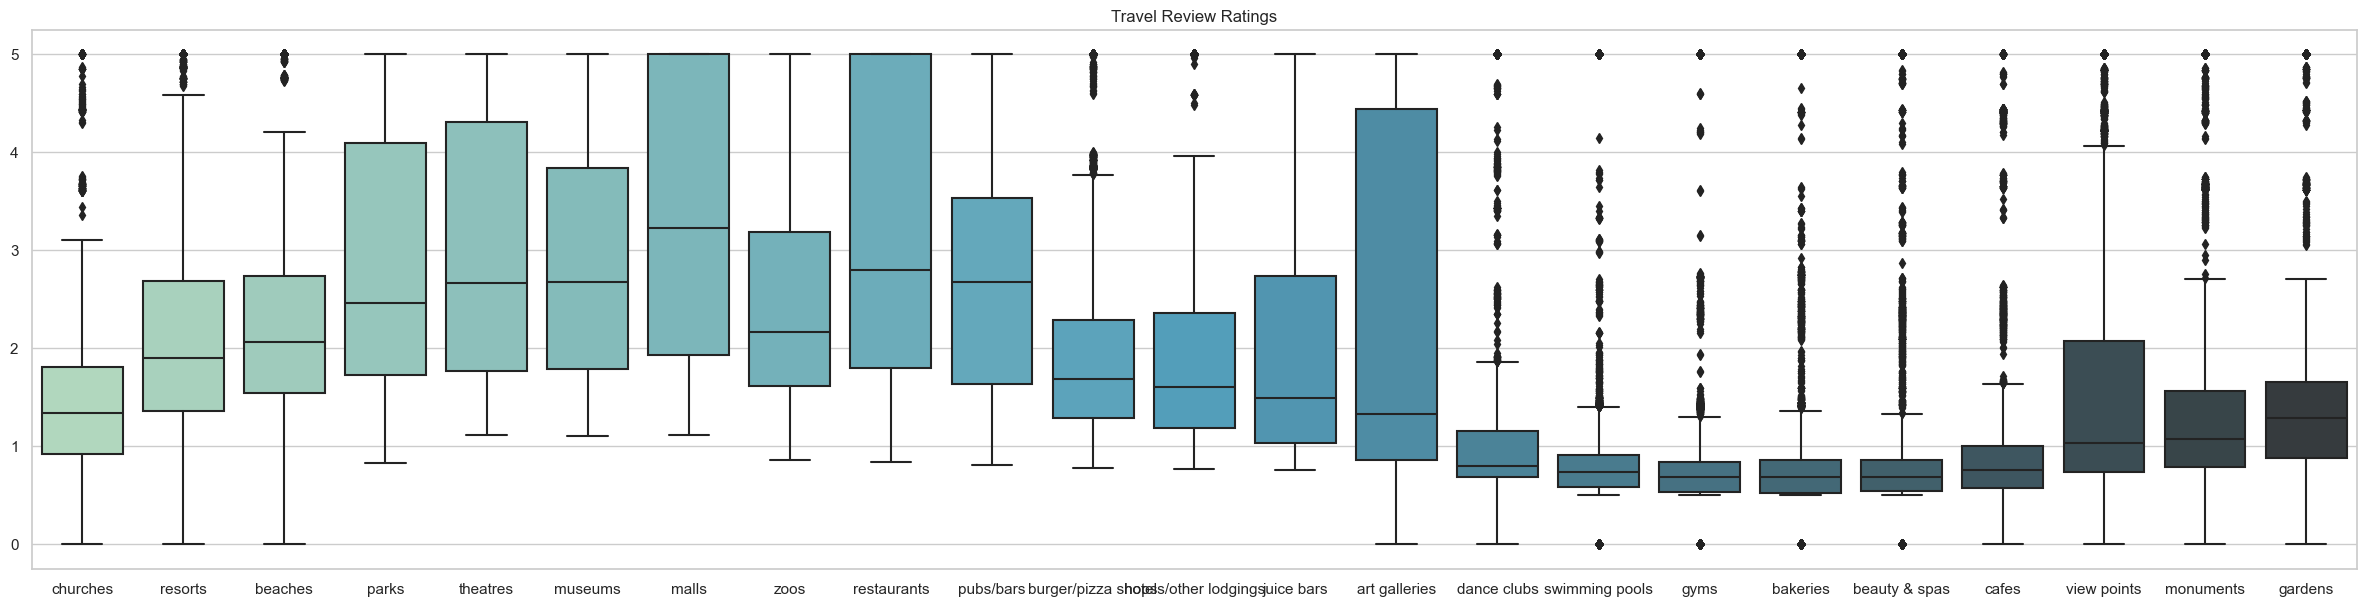

In [121]:
plt.figure(figsize = (30,7))
sns.boxplot(data = datos, palette= 'GnBu_d').set_title('Travel Review Ratings')
plt.show()

In [122]:
# Identificación de valores duplicados

print(datos.duplicated().sum()) # Filas duplicadas

print()

print("Filas duplicadas en la totalidad de la Database:")
print(datos[datos.duplicated()])

0

Filas duplicadas en la totalidad de la Database:
Empty DataFrame
Columns: [userid, churches, resorts, beaches, parks, theatres, museums, malls, zoos, restaurants, pubs/bars, local services, burger/pizza shops, hotels/other lodgings, juice bars, art galleries, dance clubs, swimming pools, gyms, bakeries, beauty & spas, cafes, view points, monuments, gardens]
Index: []

[0 rows x 25 columns]


In [123]:
# Corrección de Null y conversión a variables correspondientes según el contenido de cada columna

# Ajustar tipo de variables según el contenido de cada columna

category_columns = ['userid']
columnas_numericas = ['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums',
    'malls', 'zoos', 'restaurants', 'pubs/bars', 'local services', 'burger/pizza shops',
    'hotels/other lodgings', 'juice bars', 'art galleries', 'dance clubs', 'swimming pools',
    'gyms', 'bakeries', 'beauty & spas', 'cafes', 'view points', 'monuments', 'gardens']

# Conversión a tipo de datos correspondiente
datos[category_columns] = datos[category_columns].astype('category')
# Aplicando función para corregir datos según error code tras tratar de convertir a columnas_numericas

def limpiezaNull(x):
    try:
        # Reemplazando caractéres no numéricos (excepto por '.') por un espacio vacio
        return float(str(x).replace('\t', '').replace(' ',''))
    except ValueError:
        # En casos en que el retorno es Nan
        return np.nan

datos[columnas_numericas] = datos[columnas_numericas].apply(pd.to_numeric, errors='coerce').fillna(0)


In [124]:
# Revisión de datos corregidos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   userid                 5456 non-null   category
 1   churches               5456 non-null   float64 
 2   resorts                5456 non-null   float64 
 3   beaches                5456 non-null   float64 
 4   parks                  5456 non-null   float64 
 5   theatres               5456 non-null   float64 
 6   museums                5456 non-null   float64 
 7   malls                  5456 non-null   float64 
 8   zoos                   5456 non-null   float64 
 9   restaurants            5456 non-null   float64 
 10  pubs/bars              5456 non-null   float64 
 11  local services         5456 non-null   float64 
 12  burger/pizza shops     5456 non-null   float64 
 13  hotels/other lodgings  5456 non-null   float64 
 14  juice bars             5456 non-null   f

In [125]:
# Asignar nombres de categorías a columnas correspondientes

datos.rename(columns={
    'userid': 'Unique user id',
    'churches': 'Avg_Churches',
    'resorts': 'Avg_Resorts',
    'beaches': 'Avg_Beaches',
    'parks': 'Avg_Parks',
    'theatres': 'Avg_Theatres',
    'museums': 'Avg_Museums',
    'malls': 'Avg_Malls',
    'zoos': 'Avg_Zoo',
    'restaurants': 'Avg_Restaurants',
    'pubs/bars': 'Avg_Pubs/bars',
    'local services': 'Avg_Local services',
    'burger/pizza shops': 'Avg_Burger/pizza shops',
    'hotels/other lodgings': 'Avg_Hotels/other lodgings',
    'juice bars': 'Avg_Juice bars',
    'art galleries': 'Avg_Art galleries',
    'dance clubs': 'Avg_Dance clubs',
    'swimming pools': 'Avg_Swimming pools',
    'gyms': 'Avg_Gyms',
    'bakeries': 'Avg_Bakeries',
    'beauty & spas': 'Avg_Beauty & spas',
    'cafes': 'Avg_Cafes',
    'view points': 'Avg_View points',
    'monuments': 'Avg_Monuments',
    'gardens': 'Avg_Gardens',
}, inplace=True)

In [126]:
# Revisión de datos actualizados
datos.info()
print()
print("Null Data:",datos.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Unique user id             5456 non-null   category
 1   Avg_Churches               5456 non-null   float64 
 2   Avg_Resorts                5456 non-null   float64 
 3   Avg_Beaches                5456 non-null   float64 
 4   Avg_Parks                  5456 non-null   float64 
 5   Avg_Theatres               5456 non-null   float64 
 6   Avg_Museums                5456 non-null   float64 
 7   Avg_Malls                  5456 non-null   float64 
 8   Avg_Zoo                    5456 non-null   float64 
 9   Avg_Restaurants            5456 non-null   float64 
 10  Avg_Pubs/bars              5456 non-null   float64 
 11  Avg_Local services         5456 non-null   float64 
 12  Avg_Burger/pizza shops     5456 non-null   float64 
 13  Avg_Hotels/other lodgings  5456 n

In [127]:
# 3. Basic Info
# Estadísticas descriptivas (media, mediana, desviación estándar, percentiles, etc.).

columnas_numericas = [col for col in datos.columns if col.startswith("Avg")]

CNum = datos[columnas_numericas]

# Medidas de tendencia central

CNum.describe()

,Avg_Churches,Avg_Resorts,Avg_Beaches,Avg_Parks,Avg_Theatres,Avg_Museums,Avg_Malls,Avg_Zoo,Avg_Restaurants,Avg_Pubs/bars,...,Avg_Art galleries,Avg_Dance clubs,Avg_Swimming pools,Avg_Gyms,Avg_Bakeries,Avg_Beauty & spas,Avg_Cafes,Avg_View points,Avg_Monuments,Avg_Gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560469
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171840
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [128]:
# Medidas de variabilidad

#Varianza
varianza = CNum.var()

#Desviación estandar
desvest = CNum.std()

#Coeficiente de variación
CV = (desvest/CNum.mean())*100

#Rango
Rango = CNum.max() - CNum.min()

# Imprimir datos en forma de tabla
from tabulate import tabulate

table_data = []
for col in CNum.columns:
    table_data.append([
        col,
        varianza[col],
        desvest[col],
        CV[col],
        Rango[col]
    ])

headers = ["Variable", "Varianza", "Desviación estándar", "Coeficiente de variación", "Rango"]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------------------------+------------+-----------------------+----------------------------+---------+
| Variable                  |   Varianza |   Desviación estándar |   Coeficiente de variación |   Rango |
+===========================+============+=======================+============================+=========+
| Avg_Churches              |   0.684929 |              0.827604 |                    56.8519 |    5    |
+---------------------------+------------+-----------------------+----------------------------+---------+
| Avg_Resorts               |   2.02048  |              1.42144  |                    61.2766 |    5    |
+---------------------------+------------+-----------------------+----------------------------+---------+
| Avg_Beaches               |   1.55704  |              1.24782  |                    50.1265 |    5    |
+---------------------------+------------+-----------------------+----------------------------+---------+
| Avg_Parks                 |   1.7139   |    

In [129]:
# Medidas de forma

# Asimetría
asimetria = CNum.skew()
# Curtosis
curtosis = CNum.kurtosis()

# Imprimir datos en forma de tabla
from tabulate import tabulate

table_data = []
for col in CNum.columns:
    table_data.append([
        col,
        asimetria[col],
        curtosis[col]
    ])

headers = ["Variable", "Asimetría", "Curtosis"]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------------------------+-------------+------------+
| Variable                  |   Asimetría |   Curtosis |
+===========================+=============+============+
| Avg_Churches              |    1.66658  |  4.76233   |
+---------------------------+-------------+------------+
| Avg_Resorts               |    0.883645 | -0.397317  |
+---------------------------+-------------+------------+
| Avg_Beaches               |    1.08485  | -0.11516   |
+---------------------------+-------------+------------+
| Avg_Parks                 |    0.706732 | -0.979327  |
+---------------------------+-------------+------------+
| Avg_Theatres              |    0.487032 | -1.26603   |
+---------------------------+-------------+------------+
| Avg_Museums               |    0.558141 | -1.07159   |
+---------------------------+-------------+------------+
| Avg_Malls                 |    0.017513 | -1.60457   |
+---------------------------+-------------+------------+
| Avg_Zoo                   |  

In [130]:
# Medidas de posición

Q1 = CNum.quantile(0.25)
Q2 = CNum.quantile(0.50)
Q3 = CNum.quantile(0.75)

# Imprimir datos en forma de tabla
from tabulate import tabulate

table_data = []
for col in CNum.columns:
    table_data.append([
        col,
        Q1[col],
        Q2[col],
        Q3[col]
    ])

headers = ["Variable", "Percentil 25", "Percentil 50", "Percentil 75"]

print(tabulate(table_data, headers=headers, tablefmt="grid"))


+---------------------------+----------------+----------------+----------------+
| Variable                  |   Percentil 25 |   Percentil 50 |   Percentil 75 |
+===========================+================+================+================+
| Avg_Churches              |           0.92 |          1.34  |         1.81   |
+---------------------------+----------------+----------------+----------------+
| Avg_Resorts               |           1.36 |          1.905 |         2.6825 |
+---------------------------+----------------+----------------+----------------+
| Avg_Beaches               |           1.54 |          2.06  |         2.74   |
+---------------------------+----------------+----------------+----------------+
| Avg_Parks                 |           1.73 |          2.46  |         4.0925 |
+---------------------------+----------------+----------------+----------------+
| Avg_Theatres              |           1.77 |          2.67  |         4.3125 |
+---------------------------

# **3. Asignación de Datos para Modelo de ML:**

Se asignan valores correspondientes a "Ciudades". Teniendo en cuenta la información suministrada por la base de datos (la cual indica que los ratings corresponden a ciudades de Europa https://archive.ics.uci.edu/dataset/485/tarvel+review+ratings), se asignan nombres de ciudades de forma aleatoria con el fin de enfocar el análisis en ubicaciones específicas, facilitando así la construcción del modelo predictivo final.

In [131]:
# Agregar ciudades al random

city_list = ['London', 'Paris', 'Rome', 'Berlin', 'Barcelona', 'Amsterdam', 'Vienna', 'Prague', 'Madrid', 'Lisbon']
datos['City'] = [random.choice(city_list) for _ in range(len(datos))]
columnas = ['City'] + [col for col in datos.columns if col != 'City'] # Organizar ciudades al inicio
datos = datos[columnas]

datos['City'] = datos['City'].astype('category')

In [132]:
datos.head(10) # Nuevo orden de columnas

,City,Unique user id,Avg_Churches,Avg_Resorts,Avg_Beaches,Avg_Parks,Avg_Theatres,Avg_Museums,Avg_Malls,Avg_Zoo,...,Avg_Art galleries,Avg_Dance clubs,Avg_Swimming pools,Avg_Gyms,Avg_Bakeries,Avg_Beauty & spas,Avg_Cafes,Avg_View points,Avg_Monuments,Avg_Gardens
0,Lisbon,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.35,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,Prague,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,Madrid,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,Amsterdam,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.00,2.35,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,Lisbon,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
5,Berlin,User 6,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.63,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
6,Amsterdam,User 7,0.0,5.0,3.63,3.63,5.0,2.92,3.03,2.35,...,1.75,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
7,Amsterdam,User 8,0.0,5.0,3.63,3.63,5.0,2.92,5.00,2.63,...,1.74,0.60,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
8,Paris,User 9,0.0,5.0,3.64,3.64,5.0,2.92,3.03,2.62,...,0.75,0.60,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
9,Vienna,User 10,0.0,5.0,3.64,3.64,5.0,2.92,5.00,2.35,...,0.74,0.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
import os # Extrayendo una nueva versión de los datos, sin valores nulos e incluyendo las ciudades.

os.makedirs('data', exist_ok=True)
datos.to_csv('data/my_data.csv', index=False)

file_path = os.path.abspath('data/my_data.csv')
print(f"Saved to: {file_path}")

Saved to: C:\Users\gabri\AppData\Local\Programs\Microsoft VS Code\data\my_data.csv


# **4. Generación de Gráficas:**

*   Creación de gráficas para el análisis de datos.

In [134]:
# Melt a las columnas con ratings, manteniendo City y User ID como identificador de variables
df_melted = datos.melt(
    id_vars=['City', 'Unique user id'],
    var_name='Category',
    value_name='Rating'
)

# Resumiendo nombres para facilitar Melt
df_melted['Category'] = df_melted['Category'].str.replace('Avg_', '', regex=False)
df_melted['Rating'] = df_melted['Rating'].round(0).astype(int)

df_melted

,City,Unique user id,Category,Rating
0,Lisbon,User 1,Churches,0
1,Prague,User 2,Churches,0
2,Madrid,User 3,Churches,0
3,Amsterdam,User 4,Churches,0
4,Lisbon,User 5,Churches,0
...,...,...,...,...
130939,London,User 5452,Gardens,2
130940,Amsterdam,User 5453,Gardens,1
130941,Vienna,User 5454,Gardens,1
130942,Barcelona,User 5455,Gardens,1


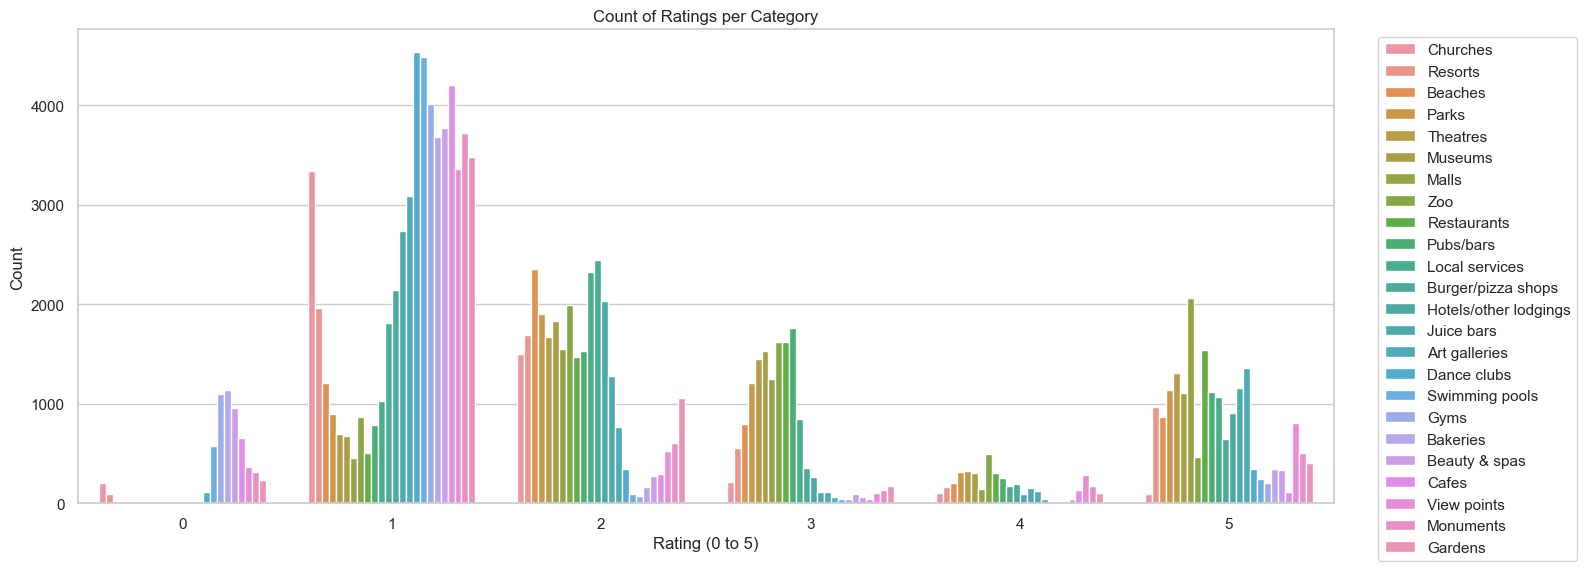

In [135]:
# Crear un countplot incluyendo todas las categorías
plt.figure(figsize=(16, 6))
sns.countplot(data=df_melted, x='Rating', hue='Category') # Clasificando por Ratings

plt.title('Count of Ratings per Category')
plt.xlabel('Rating (0 to 5)')
plt.ylabel('Count')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

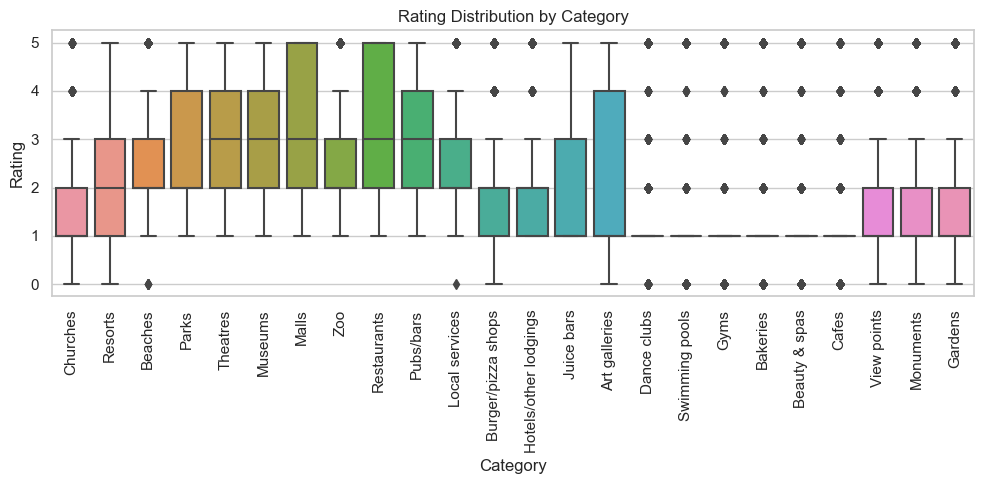

In [136]:
# Crear un boxplot incluyendo todas las categorías
sns.boxplot(data=df_melted, x='Category', y='Rating') # Clasificando por Categoría
plt.xticks(rotation=90)
plt.title('Rating Distribution by Category')
plt.tight_layout()
plt.show()

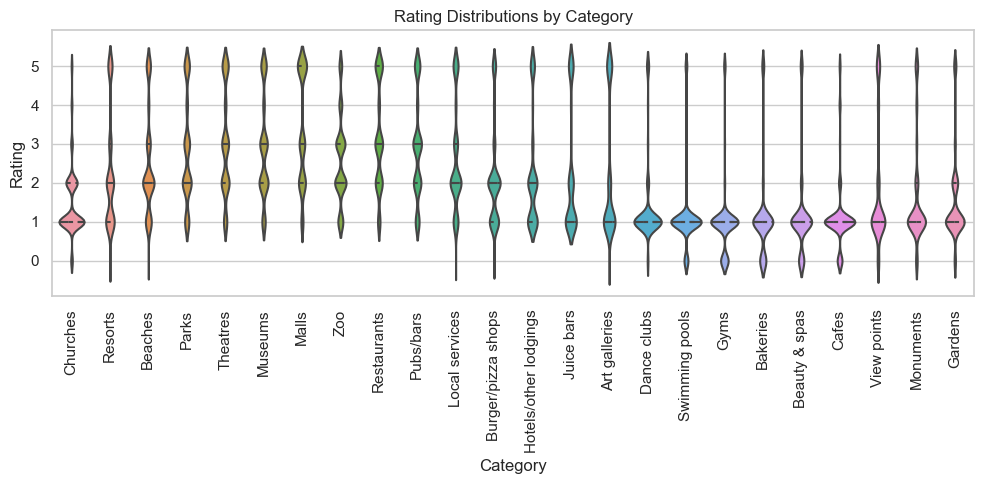

In [137]:
# Crear un violinplot incluyendo todas las categorías, para comparar la distribución de ratings entre las categorías.
sns.violinplot(data=df_melted, x='Category', y='Rating', inner='quartile') # Clasificando por Categoría
plt.xticks(rotation=90)
plt.title('Rating Distributions by Category')
plt.tight_layout()
plt.show()

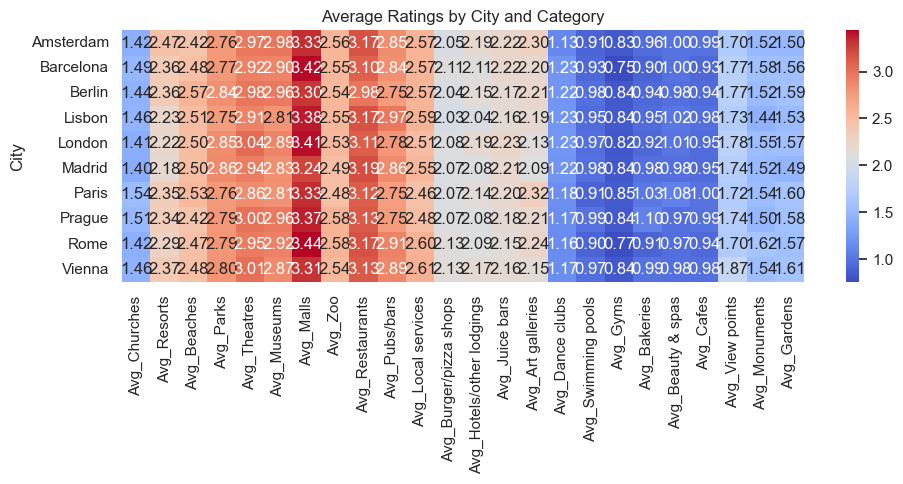

In [138]:
# Visualización con heatmap del promedio de ratings en las diferentes categorías y ciudades.
df_avg = datos.drop(columns='Unique user id').groupby('City').mean()
sns.heatmap(df_avg, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Average Ratings by City and Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

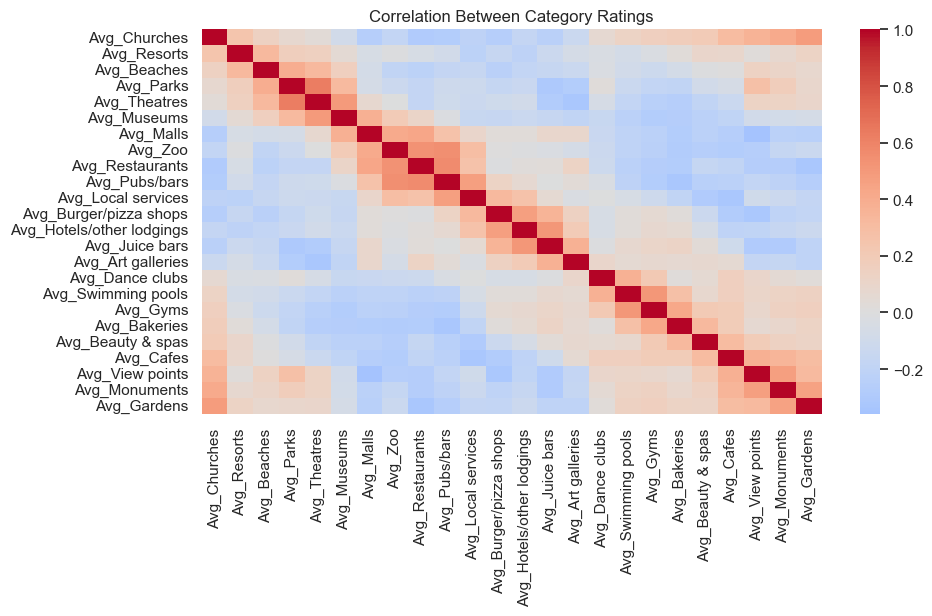

In [139]:
# Visualización con heatmap de la relación entre los ratings de las diferentes categorías.
corr = datos.drop(columns=['City', 'Unique user id']).corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Between Category Ratings')
plt.show()

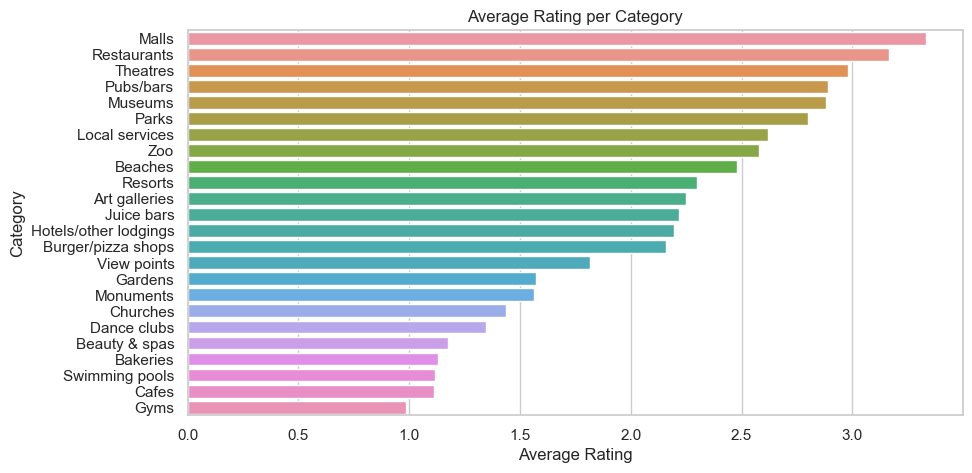

In [140]:
# Crear barplot horizontal relacionando los ratings y todas las categorías.
category_means = df_melted.groupby('Category')['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=category_means.values, y=category_means.index)
plt.title('Average Rating per Category')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

# **5. Machine Learning:**


In [141]:
datos.select_dtypes(['category']).columns

Index(['City', 'Unique user id'], dtype='object')

## One Hot Encode

In [ ]:
dfML = datos.drop(columns=["Unique user id"]) # Los valores de ID son únicos y afectan el proceso de One Hot Encode
dfML = pd.get_dummies(datos, columns=['City'], drop_first=True)


In [143]:
dfML

,Unique user id,Avg_Churches,Avg_Resorts,Avg_Beaches,Avg_Parks,Avg_Theatres,Avg_Museums,Avg_Malls,Avg_Zoo,Avg_Restaurants,...,Avg_Gardens,City_Barcelona,City_Berlin,City_Lisbon,City_London,City_Madrid,City_Paris,City_Prague,City_Rome,City_Vienna
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,0.00,0,0,1,0,0,0,0,0,0
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,0.00,0,0,0,0,0,0,1,0,0
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.00,0,0,0,0,1,0,0,0,0
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,0.00,0,0,0,0,0,0,0,0,0
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.00,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,1.56,0,0,0,1,0,0,0,0,0
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,1.09,0,0,0,0,0,0,0,0,0
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,1.11,0,0,0,0,0,0,0,0,1
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,1.12,1,0,0,0,0,0,0,0,0


In [ ]:
# Se eliminan la columna de Unique user id que no es necesaria para el análisis.
dfML.drop(['Unique user id'], axis = 1, inplace = True)

# Comprobar shape. 
print('Data for ML',dfML.shape)

# Comprobar cambios.
dfML.head()

Data for ML (5456, 33)


,Avg_Churches,Avg_Resorts,Avg_Beaches,Avg_Parks,Avg_Theatres,Avg_Museums,Avg_Malls,Avg_Zoo,Avg_Restaurants,Avg_Pubs/bars,...,Avg_Gardens,City_Barcelona,City_Berlin,City_Lisbon,City_London,City_Madrid,City_Paris,City_Prague,City_Rome,City_Vienna
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.0,0,0,1,0,0,0,0,0,0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.0,0,0,0,0,0,0,1,0,0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.0,0,0,0,0,1,0,0,0,0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.0,0,0,1,0,0,0,0,0,0


## Normalización de los Datos

In [ ]:
scaler = StandardScaler() # Método de normalización.
df_scaled = pd.DataFrame(scaler.fit_transform(dfML), columns=dfML.columns) # Data normalizada para análisis.

In [148]:
df_scaled

,Avg_Churches,Avg_Resorts,Avg_Beaches,Avg_Parks,Avg_Theatres,Avg_Museums,Avg_Malls,Avg_Zoo,Avg_Restaurants,Avg_Pubs/bars,...,Avg_Gardens,City_Barcelona,City_Berlin,City_Lisbon,City_London,City_Madrid,City_Paris,City_Prague,City_Rome,City_Vienna
0,-1.759118,-1.632094,0.914217,0.651710,1.524392,0.020674,1.166442,-0.171688,-0.586741,-0.147398,...,-1.331763,-0.337863,-0.329040,3.134549,-0.328698,-0.328355,-0.349201,-0.341555,-0.328355,-0.332790
1,-1.759118,-1.632094,0.914217,0.651710,1.524392,0.020674,1.166442,0.089270,-0.586741,-0.139750,...,-1.331763,-0.337863,-0.329040,-0.319025,-0.328698,-0.328355,-0.349201,2.927786,-0.328355,-0.332790
2,-1.759118,-1.632094,0.914217,0.636432,1.524392,0.020674,1.166442,0.089270,-0.586741,-0.147398,...,-1.331763,-0.337863,-0.329040,-0.319025,-0.328698,3.045481,-0.349201,-0.341555,-0.328355,-0.332790
3,-1.759118,-1.280305,0.914217,0.636432,1.524392,0.020674,1.166442,-0.171688,-0.586741,-0.147398,...,-1.331763,-0.337863,-0.329040,-0.319025,-0.328698,-0.328355,-0.349201,-0.341555,-0.328355,-0.332790
4,-1.759118,-1.632094,0.914217,0.636432,1.524392,0.020674,1.166442,0.089270,-0.586741,-0.147398,...,-1.331763,-0.337863,-0.329040,3.134549,-0.328698,-0.328355,-0.349201,-0.341555,-0.328355,-0.332790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,-0.659458,1.885794,1.210762,-0.005260,-0.141113,-0.252276,-0.651917,-1.305507,-0.999515,-1.371065,...,-0.000400,-0.337863,-0.329040,-0.319025,3.042308,-0.328355,-0.349201,-0.341555,-0.328355,-0.332790
5452,-0.635290,1.885794,1.226791,-0.005260,-0.133644,-0.252276,-1.118888,-1.323504,-1.006886,-1.386361,...,-0.401516,-0.337863,-0.329040,-0.319025,-0.328698,-0.328355,-0.349201,-0.341555,-0.328355,-0.332790
5453,-0.623205,1.885794,1.234806,0.002379,-0.133644,-0.252276,-1.133039,-1.341501,-1.014256,-1.401657,...,-0.384447,-0.337863,-0.329040,-0.319025,-0.328698,-0.328355,-0.349201,-0.341555,-0.328355,3.004898
5454,-0.611121,1.217396,1.250836,0.010018,-0.126175,-0.353658,-1.125963,-1.359498,-1.021627,-1.416953,...,-0.375913,2.959778,-0.329040,-0.319025,-0.328698,-0.328355,-0.349201,-0.341555,-0.328355,-0.332790


In [164]:
import os # Extrayendo una nueva versión de los datos, sin valores nulos e incluyendo las ciudades.

os.makedirs('data', exist_ok=True)
df_scaled.to_csv('data/myy_data.csv', index=False)

file_path = os.path.abspath('data/myy_data.csv')
print(f"Saved to: {file_path}")

Saved to: C:\Users\gabri\AppData\Local\Programs\Microsoft VS Code\data\myy_data.csv


## Clustering

In [149]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

df_scaled['cluster'] = clusters

## Classification (MultiOutputClassifier)

In [156]:
from itertools import combinations

avg_columns = [col for col in datos.columns if col.startswith('Avg_')]
all_input_combos = list(combinations(avg_columns, 3))


In [159]:
from random import sample

# Sample only 20 combinations to speed up
subset_combos = sample(all_input_combos, 20)

# One-time scaling
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[avg_columns]), columns=avg_columns)

results = []

for idx, input_cols in enumerate(subset_combos):
    print(f"Running combo {idx+1}/{len(subset_combos)}: {input_cols}")
    input_cols = list(input_cols)
    target_cols = [col for col in avg_columns if col not in input_cols]

    X = df_scaled[input_cols]
    Y = df_scaled[target_cols]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    model = MultiOutputRegressor(RandomForestRegressor(n_estimators=20, n_jobs=-1, random_state=42))
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    r2_scores = [r2_score(Y_test.iloc[:, i], Y_pred[:, i]) for i in range(Y_test.shape[1])]
    avg_r2 = sum(r2_scores) / len(r2_scores)

    results.append({
        "input_cols": input_cols,
        "avg_r2": avg_r2
    })

# Sort results by R²
results_sorted = sorted(results, key=lambda x: x['avg_r2'], reverse=True)

# Print top 5 combinations
print("\nTop 5 input combinations by average R²:")
for r in results_sorted[:5]:
    print(f"Inputs: {r['input_cols']}, Avg R²: {r['avg_r2']:.4f}")

Running combo 1/20: ('Avg_Malls', 'Avg_Zoo', 'Avg_Burger/pizza shops')
Running combo 2/20: ('Avg_Malls', 'Avg_Beauty & spas', 'Avg_Cafes')
Running combo 3/20: ('Avg_Parks', 'Avg_Zoo', 'Avg_Gardens')
Running combo 4/20: ('Avg_Burger/pizza shops', 'Avg_Dance clubs', 'Avg_View points')
Running combo 5/20: ('Avg_Museums', 'Avg_Malls', 'Avg_Zoo')
Running combo 6/20: ('Avg_Local services', 'Avg_Cafes', 'Avg_Gardens')
Running combo 7/20: ('Avg_Theatres', 'Avg_Museums', 'Avg_Local services')
Running combo 8/20: ('Avg_Restaurants', 'Avg_Dance clubs', 'Avg_Bakeries')
Running combo 9/20: ('Avg_Juice bars', 'Avg_Cafes', 'Avg_Gardens')
Running combo 10/20: ('Avg_Hotels/other lodgings', 'Avg_Dance clubs', 'Avg_View points')
Running combo 11/20: ('Avg_Swimming pools', 'Avg_View points', 'Avg_Monuments')
Running combo 12/20: ('Avg_Churches', 'Avg_Juice bars', 'Avg_View points')
Running combo 13/20: ('Avg_Parks', 'Avg_Pubs/bars', 'Avg_Beauty & spas')
Running combo 14/20: ('Avg_Churches', 'Avg_Restauran

## Regression (MultiOutputRegressor)

In [161]:
from random import sample

# Sample only 20 combinations to speed up
subset_combos = sample(all_input_combos, 20)

# Scale once
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[avg_columns]), columns=avg_columns)

# Round values for classification
df_rounded = df_scaled.round().astype(int)

results = []

for idx, input_cols in enumerate(subset_combos):
    print(f"Running combo {idx+1}/{len(subset_combos)}: {input_cols}")
    input_cols = list(input_cols)
    target_cols = [col for col in avg_columns if col not in input_cols]

    X = df_rounded[input_cols]
    Y = df_rounded[target_cols]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    clf = MultiOutputClassifier(RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=42))
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)

    # Compute average weighted F1-score across all targets
    f1_scores = []
    for i, col in enumerate(target_cols):
        f1 = f1_score(Y_test.iloc[:, i], Y_pred[:, i], average='weighted', zero_division=0)
        f1_scores.append(f1)

    avg_f1 = sum(f1_scores) / len(f1_scores)

    results.append({
        "input_cols": input_cols,
        "avg_f1": avg_f1
    })

# Sort and display top results
results_sorted = sorted(results, key=lambda x: x["avg_f1"], reverse=True)

print("\nTop 5 input combinations by average F1-score:")
for r in results_sorted[:5]:
    print(f"Inputs: {r['input_cols']}, Avg F1: {r['avg_f1']:.4f}")

Running combo 1/20: ('Avg_Museums', 'Avg_Juice bars', 'Avg_Swimming pools')
Running combo 2/20: ('Avg_Museums', 'Avg_Malls', 'Avg_View points')
Running combo 3/20: ('Avg_Art galleries', 'Avg_Gyms', 'Avg_Bakeries')
Running combo 4/20: ('Avg_Resorts', 'Avg_Parks', 'Avg_Dance clubs')
Running combo 5/20: ('Avg_Beaches', 'Avg_View points', 'Avg_Gardens')
Running combo 6/20: ('Avg_Zoo', 'Avg_Restaurants', 'Avg_Pubs/bars')
Running combo 7/20: ('Avg_Museums', 'Avg_Local services', 'Avg_Gardens')
Running combo 8/20: ('Avg_Parks', 'Avg_Restaurants', 'Avg_Hotels/other lodgings')
Running combo 9/20: ('Avg_Burger/pizza shops', 'Avg_Swimming pools', 'Avg_Bakeries')
Running combo 10/20: ('Avg_Restaurants', 'Avg_Hotels/other lodgings', 'Avg_Bakeries')
Running combo 11/20: ('Avg_Burger/pizza shops', 'Avg_Hotels/other lodgings', 'Avg_Bakeries')
Running combo 12/20: ('Avg_Museums', 'Avg_Juice bars', 'Avg_View points')
Running combo 13/20: ('Avg_Beaches', 'Avg_Juice bars', 'Avg_Art galleries')
Running com

In [145]:


# Keep only 'Avg_' columns for the modeling
avg_columns = [col for col in df.columns if col.startswith("Avg_")]
df_avg = df[avg_columns]

# ----- CLUSTERING -----
def run_clustering(df_avg, n_clusters=3):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_avg)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    df_clustered = df_avg.copy()
    df_clustered["cluster"] = clusters
    inertia = kmeans.inertia_
    return df_clustered, inertia

# ----- FEATURE SELECTION -----
def select_top_features(df_avg, target_col, top_n=3):
    X = df_avg.drop(columns=[target_col])
    y = df_avg[target_col]

    X_scaled = StandardScaler().fit_transform(X)
    model = RandomForestRegressor(random_state=42)
    model.fit(X_scaled, y)
    
    importance = pd.Series(model.feature_importances_, index=X.columns)
    top_features = importance.sort_values(ascending=False).head(top_n).index.tolist()
    return top_features

# ----- CLASSIFICATION -----

def run_classification(df_avg, input_cols):
    target_cols = [col for col in df_avg.columns if col not in input_cols]
    X = df_avg[input_cols]
    Y = df_avg[target_cols].copy()

    valid_targets = []
    for col in Y.columns:
        try:
            Y[col] = pd.qcut(Y[col], q=3, labels=False, duplicates='drop')
            if Y[col].nunique() >= 2:
                valid_targets.append(col)
        except ValueError:
            continue

    Y = Y[valid_targets].astype(int)

    if len(valid_targets) == 0:
        raise ValueError("No valid target columns could be discretized for classification.")

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    clf = MultiOutputClassifier(RandomForestClassifier(random_state=42))
    clf.fit(X_train_scaled, Y_train)
    Y_pred = clf.predict(X_test_scaled)

    # Compute F1-score per output and average
    f1_scores = []
    print("\nConfusion Matrices (first 3 targets):")
    for i, col in enumerate(valid_targets):
        f1 = f1_score(Y_test.iloc[:, i], Y_pred[:, i], average='weighted', zero_division=0)
        f1_scores.append(f1)
        if i < 3:
            print(f"\n{col}:\n", confusion_matrix(Y_test.iloc[:, i], Y_pred[:, i]))

    avg_f1 = np.mean(f1_scores)
    return avg_f1

# ----- REGRESSION -----
def run_regression(df_avg, input_cols):
    target_cols = [col for col in df_avg.columns if col not in input_cols]
    X = df_avg[input_cols]
    Y = df_avg[target_cols]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)

    reg = MultiOutputRegressor(RandomForestRegressor(random_state=42))
    reg.fit(X_train, Y_train)
    Y_pred = reg.predict(X_test)

    r2_scores = [r2_score(Y_test.iloc[:, i], Y_pred[:, i]) for i in range(Y_test.shape[1])]
    avg_r2 = np.mean(r2_scores)

    return avg_r2

# ---- Run All Models ----
df_clustered, inertia = run_clustering(df_avg)
print(f"Clustering Inertia: {inertia:.2f} (lower is better)")

# Use one target to get top 3 input features
sample_target = avg_columns[-1]
top_inputs = select_top_features(df_avg, sample_target, top_n=3)
print(f"\nTop 3 input features selected: {top_inputs}")

class_f1 = run_classification(df_avg, top_inputs)
print(f"\nClassification average F1-score: {class_f1:.4f}")

reg_r2 = run_regression(df_avg, top_inputs)
print(f"\nRegression average R² score: {reg_r2:.4f}")

Clustering Inertia: 99754.39 (lower is better)

Top 3 input features selected: ['Avg_Churches', 'Avg_Monuments', 'Avg_Restaurants']

Confusion Matrices (first 3 targets):

Avg_Resorts:
 [[298  26  37]
 [ 58 272  50]
 [ 46  58 247]]

Avg_Beaches:
 [[316  18  35]
 [ 30 295  50]
 [ 26  48 274]]

Avg_Parks:
 [[306  41  24]
 [ 32 297  27]
 [ 31  32 302]]

Classification average F1-score: 0.8261

Regression average R² score: 0.4789


In [146]:
# Normalizando datos

#X = datos.drop(['Unique user id', 'City'], axis=1)
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

#X_scaled
